A ternary search tree has nodes with the following attributes:
* a character, can be `None`;
* a Boolean flag that indicates whether the character represented
  by this node has been the last in a string that was inserted in the
  tree;
* the "less-than" child;
* the "equals" child and
* the "larger-than" child.

The data structure should support the following operations:
* string insert
* string search
* prefix string search
* return the number of strings stored in the data structure
* return all strings stored in the data structure

Also ensure that an instance of the data structure can be visualy represented, e.g., in aSCII format.

In [30]:
import time
import random
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from typing import List, Tuple

Ternary Search Tree Implementation: \
    *Represents a node in a Ternary Search Tree (TST).\
    *Each node stores a character, a flag indicating if it's the end of a word,\
    *and pointers to left, middle, and right child nodes.

In [31]:
class TSTNode:
    def __init__(self, char):
        self.char = char
        self.is_end = False
        self.left = None
        self.middle = None
        self.right = None

In [32]:

class TernarySearchTree:
    def __init__(self):
        self.root = None

    def insert(self, word):
        if not word:
            return
        self.root = self._insert(self.root, word, 0)

    def _insert(self, node, word, index):
        char = word[index]

        if node is None:
            node = TSTNode(char)

        if char < node.char:
            node.left = self._insert(node.left, word, index)
        elif char > node.char:
            node.right = self._insert(node.right, word, index)
        else:
            if index + 1 < len(word):
                node.middle = self._insert(node.middle, word, index + 1)
            else:
                node.is_end = True
        return node
    def search(self, word):
        if not word:
            return False
        return self._search(self.root, word, 0)

    def _search(self, node, word, index):
        if node is None:
            return False

        char = word[index]

        if char < node.char:
            return self._search(node.left, word, index)
        elif char > node.char:
            return self._search(node.right, word, index)
        else:
            if index == len(word) - 1:
                return node.is_end
            return self._search(node.middle, word, index + 1)
        
    def starts_with(self, prefix):
        if not prefix:
            return False
        return self._get_node(self.root, prefix, 0) is not None
    
    def _get_node(self, node, word, index):
        if node is None:
            return None

        char = word[index]

        if char < node.char:
            return self._get_node(node.left, word, index)
        elif char > node.char:
            return self._get_node(node.right, word, index)
        else:
            if index == len(word) - 1:
                return node
            return self._get_node(node.middle, word, index + 1)
        
    
    def get_all_words(self):
        words = []
        self._collect(self.root, "", words)
        return words

    def _collect(self, node, prefix, result):
        if node is None:
            return
        self._collect(node.left, prefix, result)
        if node.is_end:
            result.append(prefix + node.char)
        self._collect(node.middle, prefix + node.char, result)
        self._collect(node.right, prefix, result)

    def size(self):
        return len(self.get_all_words())

In [33]:

def save_results_and_plot(sample_sizes: List[int], insert_times: List[float], search_times: List[float], output_dir: str = "results"):

    # Create the output directory
    Path(output_dir).mkdir(parents=True, exist_ok=True)

    # Save results to a CSV file using pandas DataFrame
    df = pd.DataFrame({
        "Sample Size": sample_sizes,
        "Insert Time (s)": insert_times,
        "Search Time (s)": search_times
    })
    df.to_csv(Path(output_dir) / "benchmark_results.csv", index=False)
    print(f"Benchmark results saved to {Path(output_dir) / 'benchmark_results.csv'}")

    # Generate and save the performance plot
    plt.figure(figsize=(10, 6))
    plt.plot(sample_sizes, insert_times, marker='o', linestyle='-', label='Insert Time')
    plt.plot(sample_sizes, search_times, marker='s', linestyle='--', label='Search Time')
    plt.title('Ternary Search Tree Performance')
    plt.xlabel('Number of Words')
    plt.ylabel('Time (seconds)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plot_path = Path(output_dir) / "tst_performance_plot.png"
    plt.savefig(plot_path)
    print(f"Performance plot saved to {plot_path}")

    # Display plot
    # plt.show()


In [34]:
def benchmark_tst_insert_and_search(word_list: List[str], sample_sizes: List[int]) -> Tuple[List[float], List[float]]:

    insert_times = []
    search_times = []

    for size in sample_sizes:
        # Take a slice of the word_list for the current sample size
        # Ensure the sample size does not exceed the word_list length
        current_sample = word_list[:min(size, len(word_list))]
        tst = TernarySearchTree()

        # Measure insertion time
        start_insert = time.perf_counter()
        for word in current_sample:
            tst.insert(word)
        end_insert = time.perf_counter()
        insert_times.append(end_insert - start_insert)

        # Measure search time (searching for all words that were just inserted)
        start_search = time.perf_counter()
        for word in current_sample:
            # The search result (True/False) is not critical for benchmarking time,
            # so we assign it to a dummy variable _
            _ = tst.search(word)
        end_search = time.perf_counter()
        search_times.append(end_search - start_search)

    return insert_times, search_times

--- Correctness Testing ---
Inserting 22 words into the TST...
Insertion complete.

Verifying Inserted Words (Expected True):
'combine': True
'combinations': True
'combination': True
'combined': True
'combines': True
'ducks': True
'ducked': True
'duck': True
'futile': True
'futility': True
'future': True
'fontain': True
'font': True
'far': True
'a': True
'the': True
'their': True
'therefor': True
'there': True
'bomb': True
'futile': True
'there': True
All inserted words found correctly.

--- Performance Benchmarking ---
Starting benchmark with sample sizes: [500, 1000, 1500, 2000, 2500, 3000, 4000, 5000]
Benchmarking complete.
Benchmark results saved to results\benchmark_results.csv
Performance plot saved to results\tst_performance_plot.png
All words: ['a', 'bomb', 'combination', 'combinations', 'combine', 'combined', 'combines', 'duck', 'ducked', 'ducks', 'far', 'font', 'fontain', 'futile', 'futility', 'future', 'the', 'their', 'there', 'therefor']
Size: 20


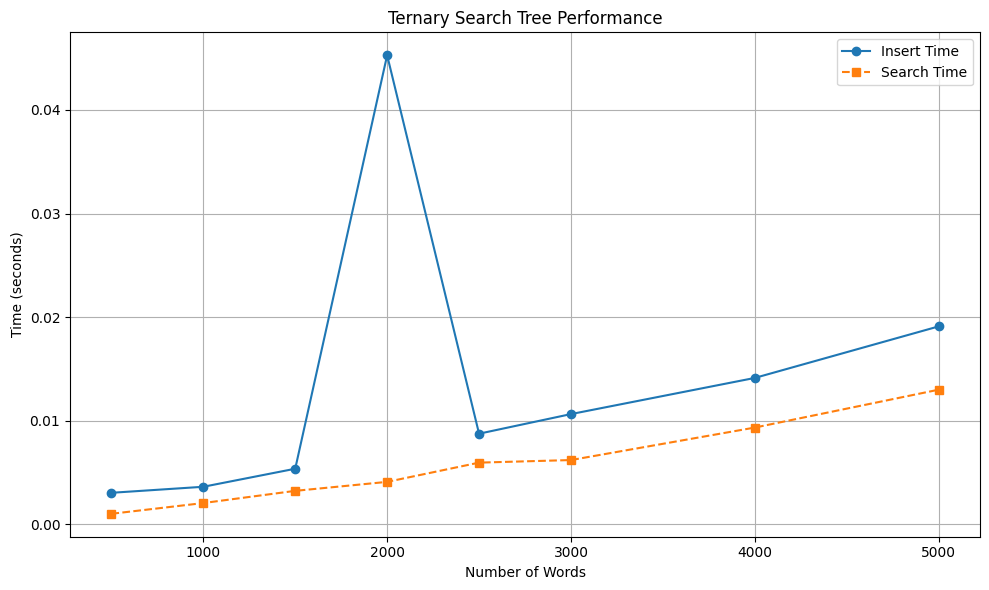

In [35]:
def main():

    # === Define File Paths ===
    insert_words_path = Path("C:/uhasselt/SecondSemester/Concept of Data Science/Concept-of-Data-Science/data/search_trees/insert_words.txt")
    not_insert_words_path = Path("C:/uhasselt/SecondSemester/Concept of Data Science/Concept-of-Data-Science/data/search_trees/not_insert_words.txt")
    corncob_path = Path("C:/uhasselt/SecondSemester/Concept of Data Science/Concept-of-Data-Science/data/search_trees/corncob_lowercase.txt")

    # === Load Words from Files ===
    try:
        with open(insert_words_path, "r", encoding="utf-8") as f:
            insert_words = [line.strip() for line in f if line.strip()]
        with open(not_insert_words_path, "r", encoding="utf-8") as f:
            not_insert_words = [line.strip() for line in f if line.strip()]
        with open(corncob_path, "r", encoding="utf-8") as f:
            large_word_list = [line.strip() for line in f if line.strip()]
    except FileNotFoundError as e:
        print(f"Error loading words: {e}. Make sure that the file location is correct.")
        print(f"Expected path for insert_words.txt: {insert_words_path}")
        print(f"Expected path for not_insert_words.txt: {not_insert_words_path}")
        print(f"Expected path for corncob_lowercase.txt: {corncob_path}")
        return
    
    # === Build and Test Tree for Correctness ===
    print("--- Correctness Testing ---")
    tst = TernarySearchTree()
    print(f"Inserting {len(insert_words)} words into the TST...")
    for word in insert_words:
        tst.insert(word)
    print("Insertion complete.")

    print("\nVerifying Inserted Words (Expected True):")
    all_correct_inserted = True
    for word in insert_words:
        result = tst.search(word)
        print(f"'{word}': {result}")
        if not result:
            all_correct_inserted = False
    if all_correct_inserted:
        print("All inserted words found correctly.")
    else:
        print("Warning: Some inserted words were not found or not marked as end of word.")
    # === Performance Benchmark ===
    print("\n--- Performance Benchmarking ---")
    # Define sample sizes for benchmarking
    max_words_available = len(large_word_list)
    initial_sizes = [500, 1000, 1500, 2000, 2500, 3000, 4000, 5000]
    sample_sizes = [size for size in initial_sizes if size <= max_words_available]
    if not sample_sizes:
        print("Warning: Sample sizes are too large for the available word list. Adjust initial_sizes or corncob_lowercase.txt.")
        return

    # Shuffle the large word list to simulate average-case insertion/search order
    random.shuffle(large_word_list)
    print(f"Starting benchmark with sample sizes: {sample_sizes}")
    insert_times, search_times = benchmark_tst_insert_and_search(large_word_list, sample_sizes)
    print("Benchmarking complete.")

    # Save results and plot
    save_results_and_plot(sample_sizes, insert_times, search_times)
    print("All words:", tst.get_all_words())  
    print("Size:", tst.size()) 

if __name__ == "__main__":
    main()